<a href="https://colab.research.google.com/github/tsega19/KF-AlphaCare-Insurance-Analytics/blob/Kf-alphacare-insurace-analytics-task-2/hypothesis_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os
import sys
import pandas as pd
import seaborn as sns

sys.path.append(os.path.abspath('/content/drive/MyDrive/KF Report/KF-AlphaCare-Insurance-Analytics/scripts'))
from hypothesis_test import *
from load_data import load_data_from_txt, missing_values, fill_missing_values, data_structure

In [5]:
# Paths for the input and output data files
input_filepath = '/content/drive/MyDrive/KF Report/MachineLearningRating_v3.txt'
output_filepath = '/content/drive/MyDrive/KF Report/MachineLearningRating_v3.csv'
# Load data
if not os.path.exists(output_filepath):
    data = load_data_from_txt(input_filepath, output_filepath)
else:
    data = pd.read_csv(output_filepath)



/content/drive/MyDrive/KF Report/KF-AlphaCare-Insurance-Analytics/scripts/load_data.py:16: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(input_filepath, delimiter='|')


In [10]:
# fill missing values
if missing_values(data).any():
    data = fill_missing_values(data)
    print('Missing values filled')
else:
    print('No missing values')


Missing values filled


Hypothesis 1: Risk differences across provinces
Group A Mean (Gauteng): 74.63, Std: 2450.12
Group B Mean (KwaZulu-Natal): 84.23, Std: 2737.97
P-value: 0.2127



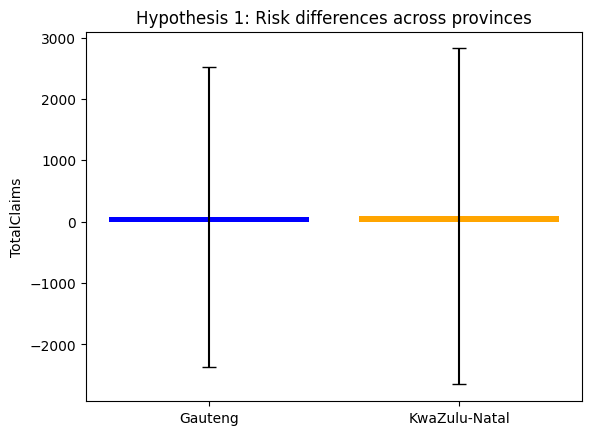

In [11]:

# Hypothesis 1: Risk differences across provinces
p_value_provinces = hypothesis_test_and_visualize(
    data, 'Province', 'TotalClaims',
    data['Province'].unique()[0], data['Province'].unique()[1],
    perform_ttest,
    "Hypothesis 1: Risk differences across provinces"
)

Hypothesis 2: Risk differences between postal codes
Group A Mean (1459): 0.00, Std: 0.00
Group B Mean (1513): 0.00, Std: 0.00
P-value: nan



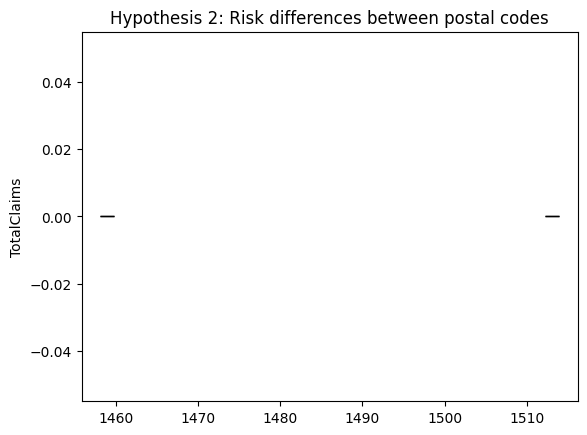

In [12]:
# Hypothesis 2: Risk differences between postal codes
p_value_postal = hypothesis_test_and_visualize(
    data, 'PostalCode', 'TotalClaims',
    data['PostalCode'].unique()[0], data['PostalCode'].unique()[1],
    perform_ttest,
    "Hypothesis 2: Risk differences between postal codes"
)

Hypothesis 3: Margin differences between postal codes
Group A Mean (1459): 73.87, Std: 170.37
Group B Mean (1513): 83.83, Std: 195.77
P-value: 0.6630



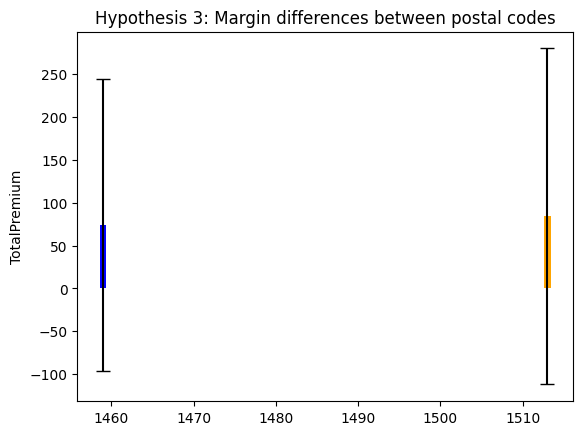

In [13]:
# Hypothesis 3: Margin differences between postal codes
p_value_margin = hypothesis_test_and_visualize(
    data, 'PostalCode', 'TotalPremium',
    data['PostalCode'].unique()[0], data['PostalCode'].unique()[1],
    perform_ttest,
    "Hypothesis 3: Margin differences between postal codes"
)

Hypothesis 4: Risk differences between Women and Men
Group A Mean (Female): 37.05, Std: 1094.09
Group B Mean (Male): 32.62, Std: 1400.63
P-value: 0.7670



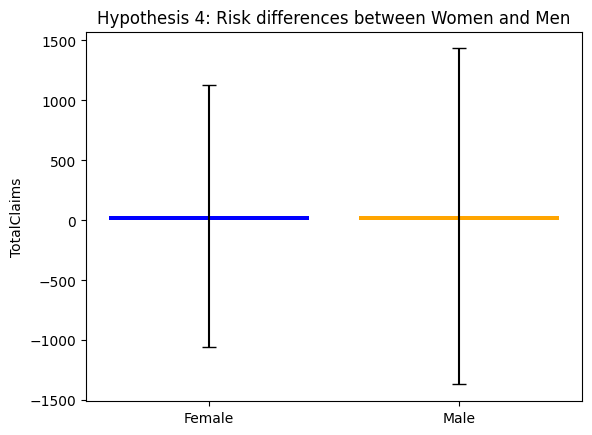

In [14]:
# Hypothesis 4: Risk differences between Women and Men
p_value_gender = hypothesis_test_and_visualize(
    data, 'Gender', 'TotalClaims',
    'Female', 'Male',
    perform_ttest,
    "Hypothesis 4: Risk differences between Women and Men"
)


In [16]:
# Hypothesis 5: Risk differences between groups A and B using Z-test
import numpy as np
from statsmodels.stats.weightstats import ztest

def perform_ztest(group_a, group_b):
    """
    Performs a two-sample Z-test.

    Args:
        group_a (array-like): Data for group A.
        group_b (array-like): Data for group B.

    Returns:
        float: p-value of the test.
    """
    # Check if either group is empty or contains only NaNs
    if len(group_a) < 2 or len(group_b) < 2 or np.isnan(group_a).all() or np.isnan(group_b).all():
        # Handle the case where Z-test is not appropriate
        # You can choose to return NaN, raise an error, or provide a default value
        # Here, we return NaN to indicate that the test couldn't be performed
        return np.nan

    z_stat, p = ztest(group_a, group_b, alternative='two-sided')
    return p
p_value_z = perform_ztest(
    data[data['Province'] == 'A']['TotalClaims'],
    data[data['Province'] == 'B']['TotalClaims']
)
print(f"Z-Test p-value: {p_value_z:.4f}")

Z-Test p-value: nan


In [17]:
# Call the function to display the conclusion
display_conclusion(p_value_provinces, p_value_postal, p_value_margin, p_value_gender, p_value_z)


=== Conclusion ===

1. Risk differences across provinces:
No significant difference in risk across provinces was found.

2. Risk differences between postal codes:
No significant difference in risk between postal codes was found.

3. Margin differences between postal codes:
No significant difference in margin between postal codes was found.

4. Risk differences between Women and Men:
No significant difference in risk between Women and Men was found.

5. Z-test result for risk difference between groups A and B:
No significant difference in risk between groups A and B was found.

=== Business Implications ===
Based on the results, consider focusing on postal codes or demographic factors where significant differences were observed. Further exploration of provinces might also be valuable if the p-values were marginally above the threshold.
